In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read tweets into notebook
with open("german.txt", "r", encoding="utf-8") as files:
    lines = files.readlines()


for line in lines:
    print(line.strip())

1. Guten Morgen, ihr Lieben! Ich hoffe, ihr habt einen wundervollen Tag! ☀️ #GutenMorgen #SchönerTag
2. Heute Abend steht ein gemütlicher Filmabend mit Kuscheldecke auf dem Programm. 🍿🎥 #Filmabend #Gemütlich
3. Heute ist ein Genusstag! Die Schokoladentorte ist einfach himmlisch! 🍰🍫 #Genusstag #Schokoladentorte
4. Das herbstliche Wetter lädt zu einem Spaziergang im Wald ein. 🍂🍁 #Herbst #Spaziergang
5. Ich liebe Wochenenden! Entspannung und Vergnügen stehen an. 🎉🛋️ #Wochenende #Entspannung
6. Heute treffe ich endlich meine Freunde wieder. Ich freue mich so sehr! 👭❤️ #Freunde #Wiedersehen
7. Ich bin so dankbar für meine Familie. Sie stehen immer an meiner Seite. ❤️ #Dankbarkeit #Familie
8. Ein neues Buch zum Lesen gefunden! Ich kann es kaum erwarten, mich hineinzufinden. 📚🤓 #NeuesBuch #Lesen
9. Heute Morgen habe ich einen wunderschönen Sonnenaufgang erlebt. Die Natur ist grandios! 🌅🏞️ #Sonnenaufgang #Natur
10. Willkommen an meine neuen Follower! Danke, dass ihr diese Reise mit mir teilt. 

In [3]:
#Create an empty list
german_list = []

#Iterate over the txt file
for line in lines:
    german_list.append(line)
    
#get into data frame
german_df = pd.DataFrame({"german_comments":german_list})

In [4]:
import re
# Function to remove numbers and punctuation using regular expressions
def remove_numbers_and_punctuation(text):
    # Replace all numbers and punctuation with an empty string
    cleaned_text = re.sub(r'[0-9!@#$%^&*(),.?":{}|<>]', '', text)
    return cleaned_text

# Apply the function to the 'Text' column in the DataFrame
german_df['Cleaned_Text'] = german_df["german_comments"].apply(remove_numbers_and_punctuation)

#removeemoji
import emoji
import unicodedata

# Function to remove emojis from text
def remove_emojis(text):
    # Replace emojis with their names using the demojize() function
    cleaned_text = emoji.demojize(text)
    return cleaned_text

# Apply the function to the 'Text' column in the DataFrame
german_df['Cleaned_Text'] = german_df['Cleaned_Text'].apply(remove_emojis)

In [5]:
#translate to english
from googletrans import Translator
import time

# Function to translate text from spanish to English with a retry mechanism
def translate_to_english(text, max_retry=5, sleep_duration=1.0):
    retry_count = 0
    translator = Translator()
    while retry_count < max_retry:
        try:
            translated_text = translator.translate(text, src='de', dest='en').text
            return translated_text
        except Exception as e:
            print(f"Translation failed. Retrying... ({retry_count + 1}/{max_retry})")
            retry_count += 1
            time.sleep(sleep_duration)
    print("Translation failed after maximum retries.")
    return None

# Apply the translation function to the 'German_Text' column in the DataFrame
german_df['English_Text'] = german_df['Cleaned_Text'].apply(translate_to_english)

german_df.drop(columns=["german_comments", "Cleaned_Text"], inplace=True)
german_df

,English_Text
0,Good morning you love I hope you have a wonder...
1,A cozy film evening with a cuddly ceiling is o...
2,Today is a genus day The chocolate cake is sim...
3,The autumn weather invites you to a walk in th...
4,I love weekends relaxation and pleasure are up...
5,Today I finally meet my friends again I am so ...
6,I am so grateful for my family You are always ...
7,A new book for reading I can hardly wait to fi...
8,This morning I experienced a wonderful sunrise...
9,Welcome to my new followers thank you for shar...


In [6]:
# Download the stopwords for English from NLTK
import nltk
nltk.download('stopwords')
nltk.download('punkt')

# to remove english stopwords
%pip install textblob
from textblob import TextBlob
from nltk.corpus import stopwords # get stopwords from NLTK library
from nltk.tokenize import word_tokenize # to create word tokens
from nltk.stem import WordNetLemmatizer # to reduce words to orginal form
from nltk.corpus import words # Get all words in english language

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\johns\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\johns\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Note: you may need to restart the kernel to use updated packages.


In [7]:
#sentiment analysis
# Function to perform sentiment analysis using TextBlob
def get_sentiment(text):
    if text is not None:  # Check if the value is not None
        analysis = TextBlob(text)
        polarity = analysis.sentiment.polarity
        if polarity > 0:
            return 'Positive'
        elif polarity < 0:
            return 'Negative'
        else:
            return 'Neutral'
    return 'Neutral'  # Return 'Neutral' for None values


# Apply the function to the 'Text' column in the DataFrame
german_df['Sentiment'] = german_df['English_Text'].apply(get_sentiment)

# Create a new DataFrame to store the results
sentiment_df = pd.DataFrame(german_df, columns=['English_Text', 'Sentiment'])

# See quick results of the Sentiment Analysis in a table format
print(sentiment_df)



                                         English_Text Sentiment
0   Good morning you love I hope you have a wonder...  Positive
1   A cozy film evening with a cuddly ceiling is o...  Negative
2   Today is a genus day The chocolate cake is sim...   Neutral
3   The autumn weather invites you to a walk in th...   Neutral
4   I love weekends relaxation and pleasure are up...  Positive
5   Today I finally meet my friends again I am so ...  Positive
6   I am so grateful for my family You are always ...   Neutral
7   A new book for reading I can hardly wait to fi...  Negative
8   This morning I experienced a wonderful sunrise...  Positive
9   Welcome to my new followers thank you for shar...  Positive
10  Time for music and household plaster for the w...   Neutral
11  Thanks to everyone for the birthday wishes I a...  Positive
12  The autumn evening is so beautiful I will enjo...  Positive
13  Today is a relaxation day I will enjoy a good ...  Positive
14  Cozy Sunday morning in bed I will st

In [9]:
# See quick results of the Sentiment Analysis
sentiment_df['Sentiment'].value_counts()

Sentiment
Positive    18
Neutral      9
Negative     3
Name: count, dtype: int64

In [8]:
#performing back translation and sentiment analysis

#drop the sentiment column in the german_df dataframe
german_df.drop(columns=["Sentiment"], inplace=True)

In [9]:
#translate to german
# Function to translate text from english to german with a retry mechanism
def translate_to_german(text, max_retry=5, sleep_duration=1.0):
    retry_count = 0
    translator = Translator()
    while retry_count < max_retry:
        try:
            translated_text = translator.translate(text, src='en', dest='de').text
            return translated_text
        except Exception as e:
            print(f"Translation failed. Retrying... ({retry_count + 1}/{max_retry})")
            retry_count += 1
            time.sleep(sleep_duration)
    print("Translation failed after maximum retries.")
    return None
# Apply the translation function to the 'german_Tweet' column in the DataFrame
german_df['German_Translation'] = german_df['English_Text'].apply(translate_to_german)

#drop english column after translation
german_df.drop(columns=["English_Text"], inplace=True)
german_df

,German_Translation
0,"Guten Morgen, du liebst Ich hoffe du hast eine..."
1,Ein gemütlicher Filmabend mit einer kuschelige...
2,"Heute ist ein Gattungstag, der Schokoladenkuch..."
3,Das Herbstwetter lädt Sie zu einem Spaziergang...
4,Ich liebe Wochenenden Entspannung und Vergnüge...
5,Heute treffe ich meine Freunde endlich wieder
6,"Ich bin so dankbar für meine Familie, dass Sie..."
7,"Ein neues Buch zum Lesen Ich kann kaum warten,..."
8,Heute Morgen habe ich einen wunderschönen Sonn...
9,"Willkommen bei meinen neuen Followern, danke, ..."


In [10]:
#to perform sentiment analysis
%pip install germansentiment
from germansentiment import SentimentModel


Note: you may need to restart the kernel to use updated packages.


c:\Users\johns\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
# convert dataframe to list and filter out any none values
texts = [text for text in german_df['German_Translation'].tolist() if text is not None]

# Create the SentimentModel instance
model = SentimentModel()

# Perform sentiment analysis on the list of German tweets
classes, probabilities = model.predict_sentiment(texts, output_probabilities=True)

# Create a DataFrame to store the results
results_df = pd.DataFrame({'Text': texts, 'Sentiment': classes, 'Probability': probabilities})

# Display the DataFrame
print(results_df)

                                                 Text Sentiment  \
0   Guten Morgen, du liebst Ich hoffe du hast eine...   neutral   
1   Ein gemütlicher Filmabend mit einer kuschelige...   neutral   
2   Heute ist ein Gattungstag, der Schokoladenkuch...   neutral   
3   Das Herbstwetter lädt Sie zu einem Spaziergang...   neutral   
4   Ich liebe Wochenenden Entspannung und Vergnüge...  positive   
5       Heute treffe ich meine Freunde endlich wieder  positive   
6   Ich bin so dankbar für meine Familie, dass Sie...  positive   
7   Ein neues Buch zum Lesen Ich kann kaum warten,...   neutral   
8   Heute Morgen habe ich einen wunderschönen Sonn...   neutral   
9   Willkommen bei meinen neuen Followern, danke, ...  negative   
10  Zeit für Musik und Haushaltspflaster für das W...   neutral   
11  Vielen Dank an alle für die Geburtstagswünsche...  positive   
12  Der Herbstabend ist so schön, dass ich die Zei...   neutral   
13  Heute ist ein Entspannungstag. Ich werde ein g...   neutra

In [14]:
# Group by 'Sentiment_Group' and calculate the count of each group
summary_df = results_df.groupby('Sentiment').size().reset_index(name='Count')

# Display the summary DataFrame
print(summary_df)


  Sentiment  Count
0  negative      2
1   neutral     21
2  positive      7


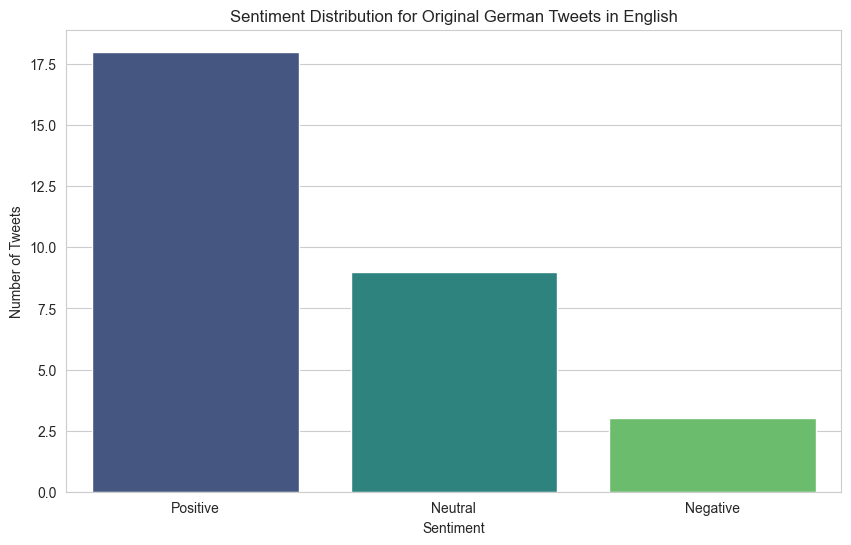

In [15]:
# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set_style("whitegrid")

# Get the sentiment count
original_sentiment_counts = sentiment_df['Sentiment'].value_counts()

# Plot the results
plt.figure(figsize=(10,6))
sns.barplot(x=original_sentiment_counts.index, y=original_sentiment_counts.values, palette="viridis")
plt.title('Sentiment Distribution for Original German Tweets in English')
plt.ylabel('Number of Tweets')
plt.xlabel('Sentiment')
plt.show()

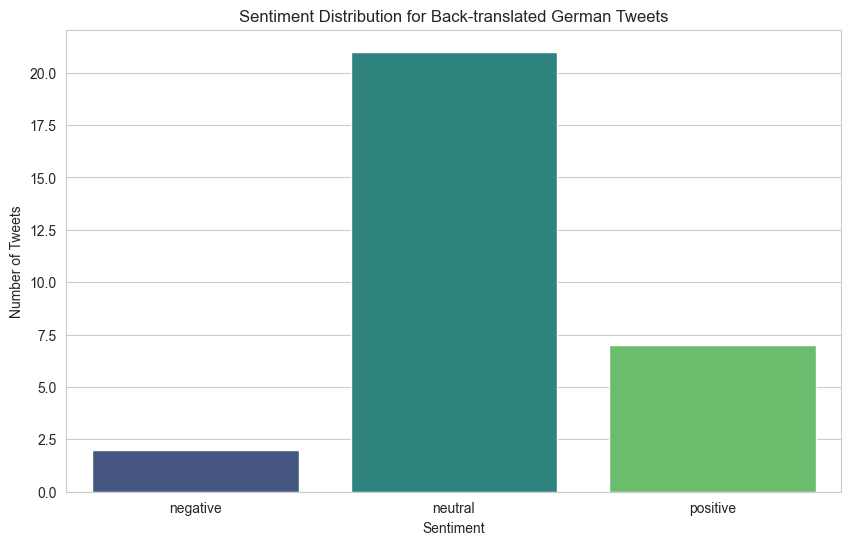

In [16]:
# Get the sentiment count from the summary
back_translated_sentiment_counts = summary_df.set_index('Sentiment')['Count']

# Plot the results
plt.figure(figsize=(10,6))
sns.barplot(x=back_translated_sentiment_counts.index, y=back_translated_sentiment_counts.values, palette="viridis")
plt.title('Sentiment Distribution for Back-translated German Tweets')
plt.ylabel('Number of Tweets')
plt.xlabel('Sentiment')
plt.show()


In [17]:
# Create a column in each dataframe for merging
sentiment_df['index_for_merge'] = sentiment_df.index
results_df['index_for_merge'] = results_df.index

# Merge the two dataframes on this column
merged_df = pd.merge(sentiment_df, results_df, how="inner", left_on='index_for_merge', right_on='index_for_merge')

# Rename columns for clarity
merged_df.rename(columns={"Sentiment_x": "Original_Sentiment", "Sentiment_y": "Backtranslated_Sentiment"}, inplace=True)

# Check the merged dataframe
print(merged_df.head())


                                        English_Text Original_Sentiment  \
0  Good morning you love I hope you have a wonder...           Positive   
1  A cozy film evening with a cuddly ceiling is o...           Negative   
2  Today is a genus day The chocolate cake is sim...            Neutral   
3  The autumn weather invites you to a walk in th...            Neutral   
4  I love weekends relaxation and pleasure are up...           Positive   

   index_for_merge                                               Text  \
0                0  Guten Morgen, du liebst Ich hoffe du hast eine...   
1                1  Ein gemütlicher Filmabend mit einer kuschelige...   
2                2  Heute ist ein Gattungstag, der Schokoladenkuch...   
3                3  Das Herbstwetter lädt Sie zu einem Spaziergang...   
4                4  Ich liebe Wochenenden Entspannung und Vergnüge...   

  Backtranslated_Sentiment                                        Probability  
0                  neutral  [[

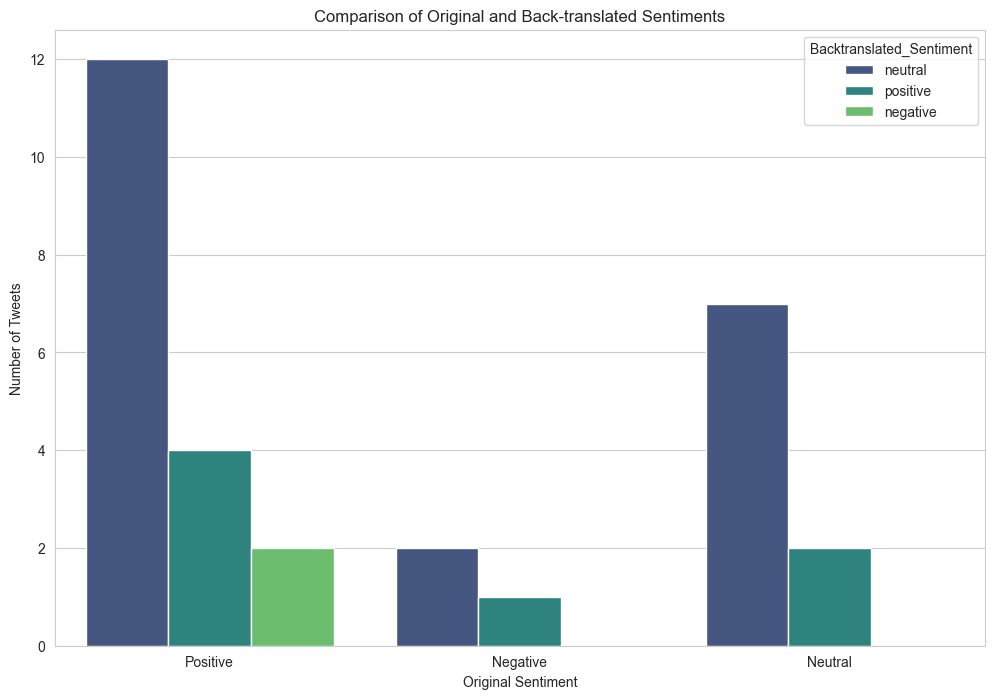

In [18]:
# Plot
plt.figure(figsize=(12,8))
sns.countplot(x="Original_Sentiment", hue="Backtranslated_Sentiment", data=merged_df, palette="viridis")
plt.title('Comparison of Original and Back-translated Sentiments')
plt.ylabel('Number of Tweets')
plt.xlabel('Original Sentiment')
plt.show()


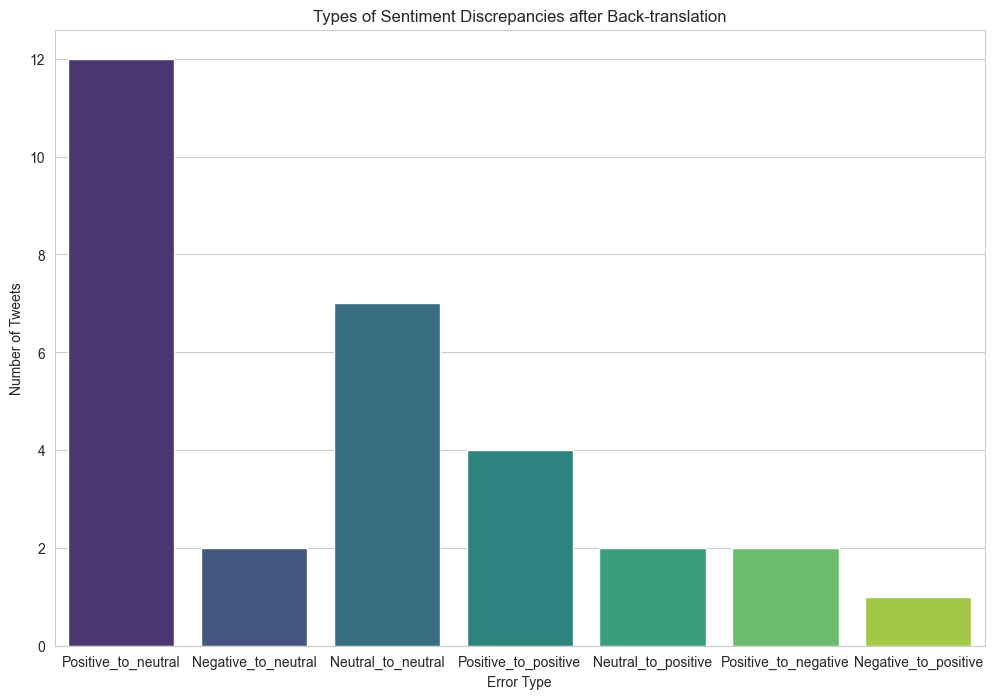

In [19]:
# Filter out rows where sentiments do not match
errors_df = merged_df[merged_df["Original_Sentiment"] != merged_df["Backtranslated_Sentiment"]]

# Create a column to categorize the type of error
errors_df["Error_Type"] = errors_df["Original_Sentiment"] + "_to_" + errors_df["Backtranslated_Sentiment"]

# Plot
plt.figure(figsize=(12,8))
sns.countplot(x="Error_Type", data=errors_df, palette="viridis")
plt.title('Types of Sentiment Discrepancies after Back-translation')
plt.ylabel('Number of Tweets')
plt.xlabel('Error Type')
plt.show()


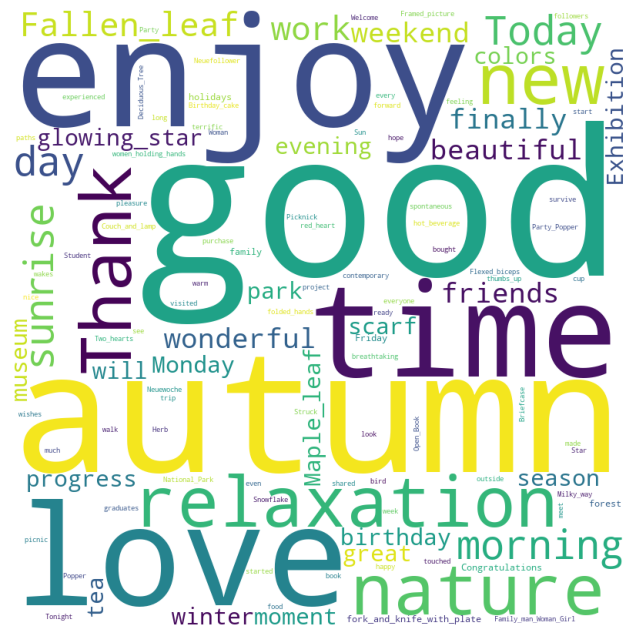

In [20]:
from wordcloud import WordCloud

def generate_wordcloud(text):
    wordcloud = WordCloud(background_color='white', width=800, height=800).generate(text)
    plt.figure(figsize=(8,8))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

# Generate word cloud for positive sentiments in the original text
positive_words = ' '.join(sentiment_df[sentiment_df['Sentiment'] == 'Positive']['English_Text'])
generate_wordcloud(positive_words)

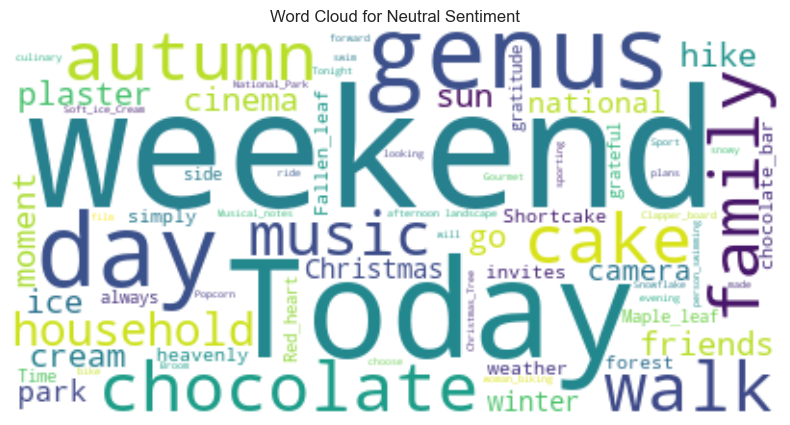

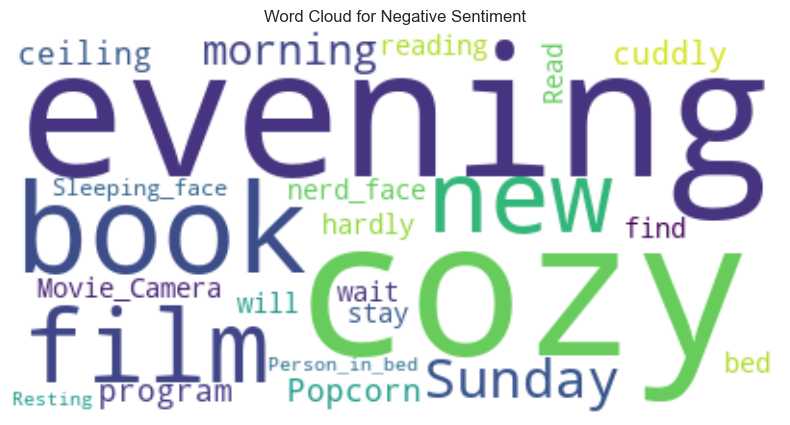

In [25]:
# Create word clouds for each sentiment
for sentiment in ['Neutral', 'Negative']:
    subset = merged_df[merged_df['Original_Sentiment'] == sentiment]
    text = ' '.join(subset['English_Text'].values)
    
    wordcloud = WordCloud(background_color='white', max_words=100, contour_width=5, contour_color='blue').generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment} Sentiment')
    plt.show()


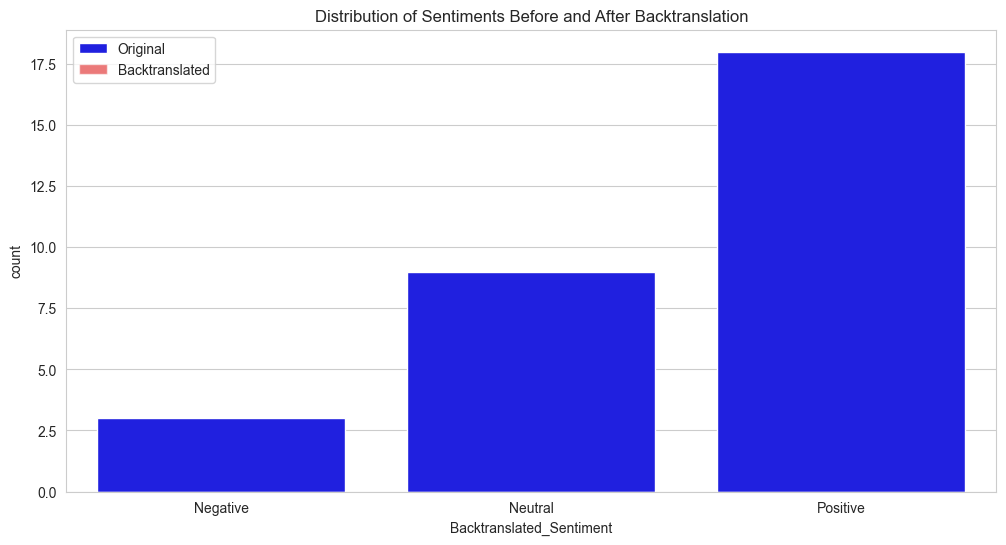

In [24]:
plt.figure(figsize=(12,6))
sns.countplot(data=merged_df, x="Original_Sentiment", order=["Negative", "Neutral", "Positive"], color='blue', label="Original")
sns.countplot(data=merged_df, x="Backtranslated_Sentiment", order=["Negative", "Neutral", "Positive"], color='red', alpha=0.6, label="Backtranslated")
plt.title('Distribution of Sentiments Before and After Backtranslation')
plt.legend()
plt.show()


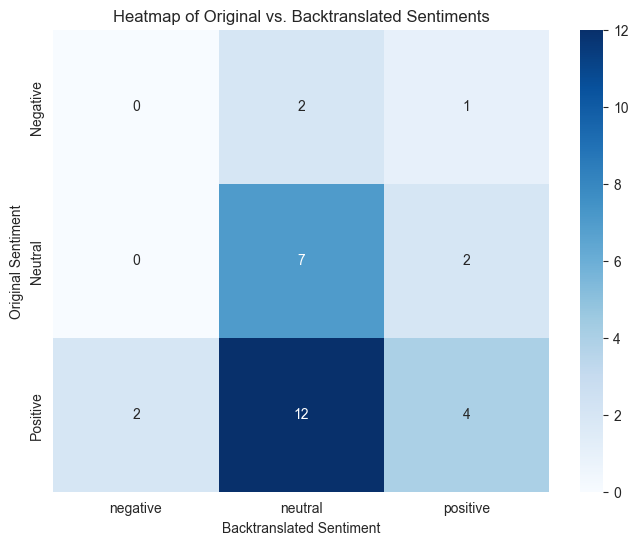

In [23]:
crosstab = pd.crosstab(merged_df["Original_Sentiment"], merged_df["Backtranslated_Sentiment"])
plt.figure(figsize=(8,6))
sns.heatmap(crosstab, annot=True, cmap="Blues", fmt="d")
plt.title('Heatmap of Original vs. Backtranslated Sentiments')
plt.ylabel('Original Sentiment')
plt.xlabel('Backtranslated Sentiment')
plt.show()


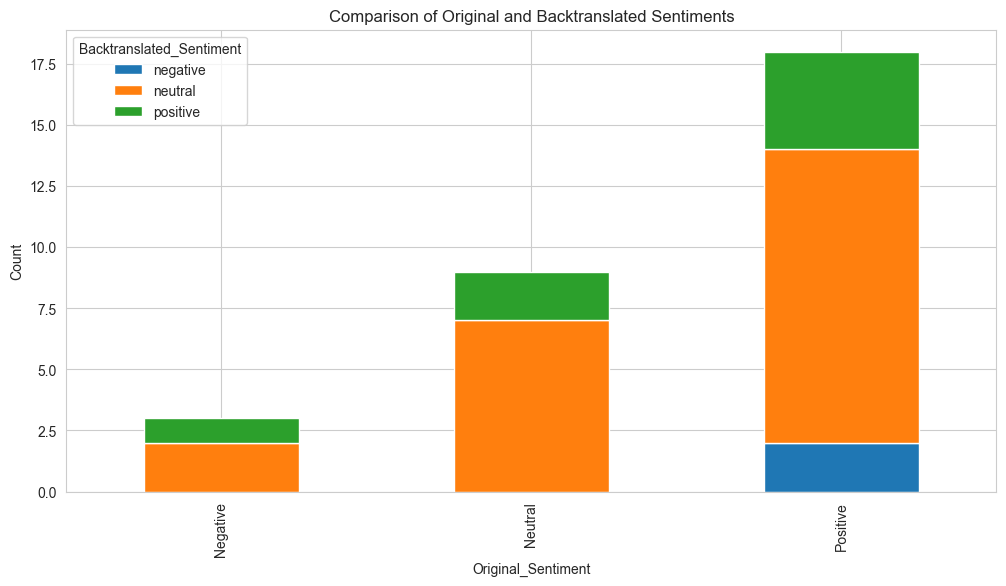

In [26]:
grouped = merged_df.groupby(['Original_Sentiment', 'Backtranslated_Sentiment']).size().unstack().fillna(0)
grouped.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Comparison of Original and Backtranslated Sentiments')
plt.ylabel('Count')
plt.show()

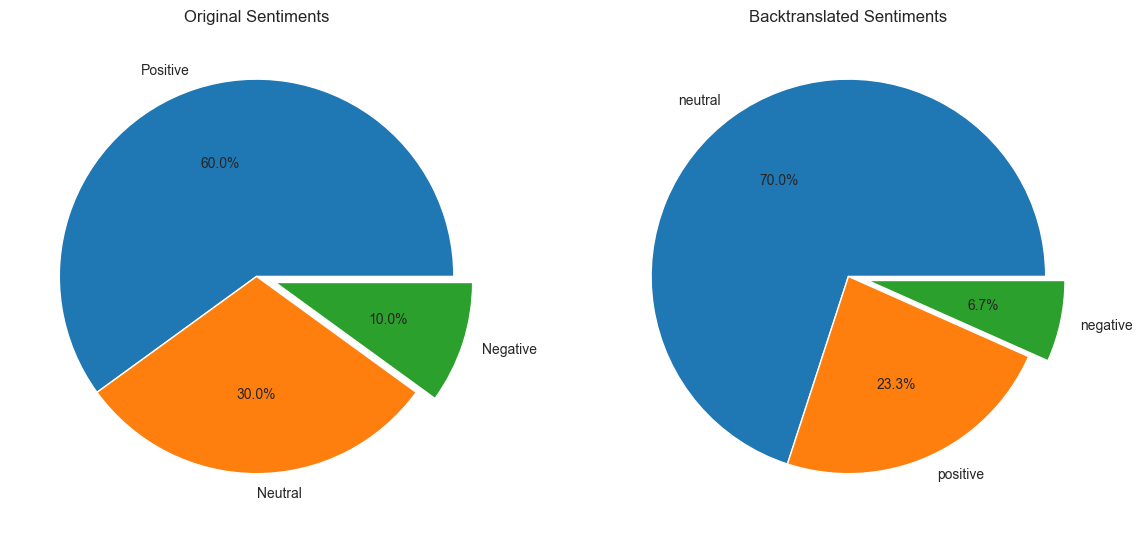

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(14,7))

merged_df['Original_Sentiment'].value_counts().plot.pie(explode=[0,0,0.1], autopct='%1.1f%%', ax=ax[0])
ax[0].set_title('Original Sentiments')
ax[0].set_ylabel('')

merged_df['Backtranslated_Sentiment'].value_counts().plot.pie(explode=[0,0,0.1], autopct='%1.1f%%', ax=ax[1])
ax[1].set_title('Backtranslated Sentiments')
ax[1].set_ylabel('')

plt.show()
